# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [16]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score
import os

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [17]:
data = pd.read_csv(os.getcwd() + '/Data/Salary_Data.csv')
X = data['YearsExperience'].values.reshape(-1, 1)
Y = data['Salary'].values.reshape(-1, 1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 0)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

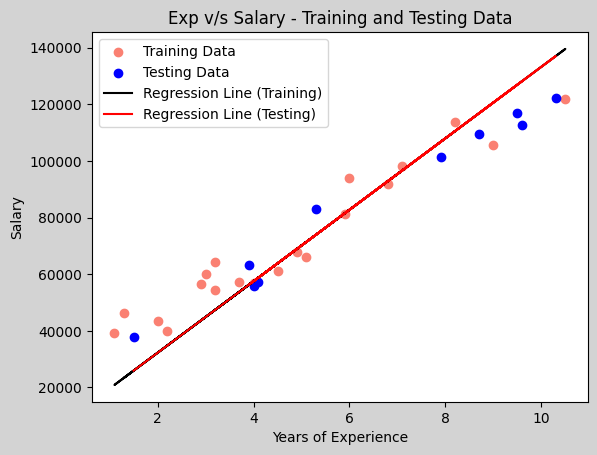

In [18]:
def linear_model(X,Y,learning_rate,iter):
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0
    for i in range(iter):
        y_predict = X.dot(w) + b
        diff = Y - y_predict
        dw = -np.dot(X.T, Y - y_predict) / m
        db = -np.sum(Y - y_predict)/m
        w = w - learning_rate*dw
        b = b - learning_rate*db
    return b,w
b,w = linear_model(x_train, y_train, learning_rate = 0.01, iter  = 100)
y_test_predict = x_test.dot(w[0][0]) + b
plt.figure(facecolor='lightgray') 
plt.scatter(x_train, y_train, color='Salmon', label='Training Data')
plt.scatter(x_test, y_test, color='Blue', label='Testing Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Exp v/s Salary - Training and Testing Data')
plt.plot(x_train, w[0] * x_train + b, color='Black', label='Regression Line (Training)')
plt.plot(x_test, y_test_predict, color='Red', label='Regression Line (Testing)')
plt.legend()
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [19]:
sal_binary = [1  if i<60000 else 0 for i in data['Salary'] ]
data['Salary<60000'] = sal_binary
X = data['YearsExperience'].values.reshape(-1, 1)
Y = data['Salary<60000'].values.reshape(-1, 1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 0)
def LogisticRegression(x_train, theta_0, theta_1):
    return 1 / (1 + np.exp(-(theta_0 + theta_1 * x_train)))

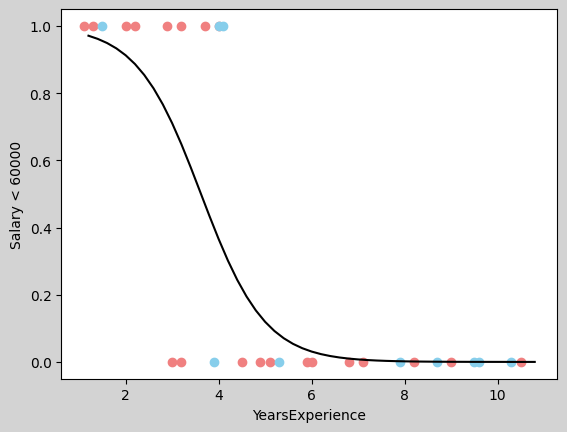

In [20]:
t_0 = 0.0
t_1 = 0.0
lr = 0.01
iterations = 1000
def model(x):
    exponent = t_0 + t_1 * x
    return 1 / (1 + np.exp(-exponent))
for _ in range(iterations):
    pred = LogisticRegression(x_train, t_0, t_1)
    theta_0_new = t_0 + lr * (y_train - pred).sum()
    theta_1_new = t_1 + lr * ((y_train - pred) * x_train).sum()
    t_0 = theta_0_new
    t_1 = theta_1_new
x = np.arange(1.2, 11., 0.2)
sig = [model(i) for i in x]
plt.figure(facecolor='lightgray') 
plt.xlabel('YearsExperience')
plt.ylabel('Salary < 60000')
plt.scatter(x_train, y_train, c='lightcoral')
plt.scatter(x_test, y_test, c='skyblue')
plt.plot(x, sig, color = 'Black')
plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [21]:
r2 = r2_score(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = mean_squared_error(y_test, y_test_predict, squared=False)
print("R2:",r2)
print("MAE:",mae)
print("RMSE:",rmse)

R2: -44027874317.35481
MAE: 88826.46486129746
RMSE: 96155.36182062085


In [22]:
test_predictions = [model(x) for x in x_test]
test_predictions_binary = np.array(test_predictions) > 0.5  # Convert probabilities to binary predictions (0 or 1)

# Calculate testing accuracy
test_accuracy = np.mean(test_predictions_binary == y_test)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8
